In [1]:
import yfinance as yf
import numpy as np
import ta
#strategy buy k and D line both hit below 20 and went above 20 but not above 80 RSI aboe20 and Macd cross the signal line 
#sell k and line above 20 after k and d line hit 80,Rsi below 50 signal line cross the macd line 

In [2]:
df=yf.download('BTC-USD',start='2022-12-15',interval='30m')

[*********************100%***********************]  1 of 1 completed


In [3]:
df['%k']=ta.momentum.stoch(df.High,df.Low,df.Close,window=14,smooth_window=3)

In [4]:
df['%D']=df['%k'].rolling(3).mean()

In [5]:
df['rsi']=ta.momentum.rsi(df.Close,window=14)

In [6]:
df['macd']=ta.trend.macd_diff(df.Close)

In [7]:
df

,Open,High,Low,Close,Adj Close,Volume,%k,%D,rsi,macd
Datetime,,,,,,,,,,
2022-12-14 18:00:00+00:00,18099.708984,18239.792969,18088.482422,18235.445312,18235.445312,529453056,NaN,NaN,NaN,NaN
2022-12-14 18:30:00+00:00,18235.482422,18318.531250,18233.458984,18314.566406,18314.566406,826947584,NaN,NaN,NaN,NaN
2022-12-14 19:00:00+00:00,18244.687500,18244.687500,17895.464844,17909.908203,17909.908203,2621554688,NaN,NaN,NaN,NaN
2022-12-14 19:30:00+00:00,17909.701172,17909.701172,17811.703125,17811.703125,17811.703125,1181546496,NaN,NaN,NaN,NaN
2022-12-14 20:00:00+00:00,17808.406250,17906.134766,17799.275391,17859.304688,17859.304688,584808448,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-01-13 13:00:00+00:00,18861.767578,18894.351562,18842.242188,18885.351562,18885.351562,121612288,37.248445,38.928366,54.679202,-13.229380
2023-01-13 13:30:00+00:00,18886.009766,18893.736328,18865.992188,18865.992188,18865.992188,0,28.590769,31.681114,52.494311,-15.746456
2023-01-13 14:00:00+00:00,18866.214844,18934.082031,18851.724609,18934.082031,18934.082031,0,59.041122,41.626779,58.739152,-12.709999


In [8]:
df.dropna(inplace=True)

In [9]:
np.where((df['%k'].shift(1)<20)&(df['%D'].shift(1)<20)|
        (df['%k'].shift(2)<20)&(df['%D'].shift(2)<20))

(array([   7,    8,    9,   10,   11,   12,   13,   14,   15,   16,   17,
          18,   19,   24,   25,   26,   27,   47,   48,   49,   50,   51,
          52,   53,   54,   55,   56,   57,   58,   59,   60,   61,   62,
          63,   64,   65,   66,   67,   73,   74,   75,   76,  103,  104,
         105,  106,  154,  155,  157,  158,  159,  178,  179,  180,  203,
         204,  205,  206,  207,  208,  209,  210,  211,  212,  213,  217,
         218,  219,  220,  275,  276,  277,  278,  302,  303,  304,  305,
         306,  307,  308,  309,  310,  344,  345,  346,  347,  348,  349,
         350,  351,  352,  353,  354,  393,  394,  408,  409,  410,  411,
         412,  470,  471,  525,  526,  527,  538,  539,  540,  579,  580,
         581,  582,  583,  584,  585,  586,  590,  591,  592,  593,  594,
         595,  616,  617,  618,  637,  638,  643,  644,  645,  646,  647,
         648,  649,  650,  711,  712,  713,  714,  715,  716,  717,  729,
         730,  756,  757,  758,  759, 

In [10]:
import pandas as pd

In [11]:
dfx=pd.DataFrame()
for i in range(1,4):
    mask=(df['%k'].shift(i)<20)&(df['%D'].shift(i)<20)
    dfx=dfx.append(mask,ignore_index=True)

In [12]:
dfx

,2022-12-15 10:30:00+00:00,2022-12-15 11:00:00+00:00,2022-12-15 11:30:00+00:00,2022-12-15 12:00:00+00:00,2022-12-15 12:30:00+00:00,2022-12-15 13:00:00+00:00,2022-12-15 13:30:00+00:00,2022-12-15 14:00:00+00:00,2022-12-15 14:30:00+00:00,2022-12-15 15:00:00+00:00,...,2023-01-13 10:30:00+00:00,2023-01-13 11:00:00+00:00,2023-01-13 11:30:00+00:00,2023-01-13 12:00:00+00:00,2023-01-13 12:30:00+00:00,2023-01-13 13:00:00+00:00,2023-01-13 13:30:00+00:00,2023-01-13 14:00:00+00:00,2023-01-13 14:30:00+00:00,2023-01-13 15:00:00+00:00
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
dfx.sum(axis=0)

2022-12-15 10:30:00+00:00    0.0
2022-12-15 11:00:00+00:00    0.0
2022-12-15 11:30:00+00:00    0.0
2022-12-15 12:00:00+00:00    0.0
2022-12-15 12:30:00+00:00    0.0
                            ... 
2023-01-13 13:00:00+00:00    0.0
2023-01-13 13:30:00+00:00    0.0
2023-01-13 14:00:00+00:00    0.0
2023-01-13 14:30:00+00:00    0.0
2023-01-13 15:00:00+00:00    0.0
Freq: 30T, Length: 1402, dtype: float64

In [14]:
def gettriggers(df,lags,buy=True):
    dfx=pd.DataFrame()
    for i in range(1,lags+1):
        if buy:
            mask=(df['%k'].shift(i)<20)&(df['%D'].shift(i)<20)
        else:
            mask=(df['%k'].shift(i)>80)&(df['%D'].shift(i)>80)
        dfx=dfx.append(mask,ignore_index=True)
    return dfx.sum(axis=0)

In [15]:
gettriggers(df,4)

2022-12-15 10:30:00+00:00    0.0
2022-12-15 11:00:00+00:00    0.0
2022-12-15 11:30:00+00:00    0.0
2022-12-15 12:00:00+00:00    0.0
2022-12-15 12:30:00+00:00    0.0
                            ... 
2023-01-13 13:00:00+00:00    0.0
2023-01-13 13:30:00+00:00    0.0
2023-01-13 14:00:00+00:00    0.0
2023-01-13 14:30:00+00:00    0.0
2023-01-13 15:00:00+00:00    0.0
Freq: 30T, Length: 1402, dtype: float64

In [16]:
np.where(gettriggers(df,4,),1,0)#getting o where sum is not greater than 0 

array([0, 0, 0, ..., 0, 0, 0])

In [17]:
df['Buytrigger']=np.where(gettriggers(df,4,),1,0)

In [18]:
df['selltrigger']=np.where(gettriggers(df,4,False),1,0)

In [19]:
df

,Open,High,Low,Close,Adj Close,Volume,%k,%D,rsi,macd,Buytrigger,selltrigger
Datetime,,,,,,,,,,,,
2022-12-15 10:30:00+00:00,17683.447266,17687.291016,17671.277344,17686.175781,17686.175781,76226560,36.567625,37.152060,34.551288,9.003477,0,0
2022-12-15 11:00:00+00:00,17685.568359,17696.519531,17680.089844,17696.519531,17696.519531,51658752,48.262645,38.954515,36.907782,10.423393,0,0
2022-12-15 11:30:00+00:00,17695.984375,17716.396484,17695.138672,17715.226562,17715.226562,120950784,68.323385,51.051218,41.042234,12.589096,0,0
2022-12-15 12:00:00+00:00,17715.994141,17725.875000,17707.828125,17717.833984,17717.833984,0,71.119489,62.568506,41.616513,14.052581,0,0
2022-12-15 12:30:00+00:00,17719.056641,17720.707031,17682.009766,17684.943359,17684.943359,5015552,35.848780,58.430551,36.753292,12.701780,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-13 13:00:00+00:00,18861.767578,18894.351562,18842.242188,18885.351562,18885.351562,121612288,37.248445,38.928366,54.679202,-13.229380,0,1
2023-01-13 13:30:00+00:00,18886.009766,18893.736328,18865.992188,18865.992188,18865.992188,0,28.590769,31.681114,52.494311,-15.746456,0,0
2023-01-13 14:00:00+00:00,18866.214844,18934.082031,18851.724609,18934.082031,18934.082031,0,59.041122,41.626779,58.739152,-12.709999,0,0


In [20]:
df['%k'].between(20,80)

Datetime
2022-12-15 10:30:00+00:00     True
2022-12-15 11:00:00+00:00     True
2022-12-15 11:30:00+00:00     True
2022-12-15 12:00:00+00:00     True
2022-12-15 12:30:00+00:00     True
                             ...  
2023-01-13 13:00:00+00:00     True
2023-01-13 13:30:00+00:00     True
2023-01-13 14:00:00+00:00     True
2023-01-13 14:30:00+00:00    False
2023-01-13 15:00:00+00:00    False
Freq: 30T, Name: %k, Length: 1402, dtype: bool

In [21]:
df['Buy']=np.where((df.Buytrigger)&(df['%k'].between(20,80))&(df.rsi<50)&(df.macd<0),1,0)
df

,Open,High,Low,Close,Adj Close,Volume,%k,%D,rsi,macd,Buytrigger,selltrigger,Buy
Datetime,,,,,,,,,,,,,
2022-12-15 10:30:00+00:00,17683.447266,17687.291016,17671.277344,17686.175781,17686.175781,76226560,36.567625,37.152060,34.551288,9.003477,0,0,0
2022-12-15 11:00:00+00:00,17685.568359,17696.519531,17680.089844,17696.519531,17696.519531,51658752,48.262645,38.954515,36.907782,10.423393,0,0,0
2022-12-15 11:30:00+00:00,17695.984375,17716.396484,17695.138672,17715.226562,17715.226562,120950784,68.323385,51.051218,41.042234,12.589096,0,0,0
2022-12-15 12:00:00+00:00,17715.994141,17725.875000,17707.828125,17717.833984,17717.833984,0,71.119489,62.568506,41.616513,14.052581,0,0,0
2022-12-15 12:30:00+00:00,17719.056641,17720.707031,17682.009766,17684.943359,17684.943359,5015552,35.848780,58.430551,36.753292,12.701780,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-13 13:00:00+00:00,18861.767578,18894.351562,18842.242188,18885.351562,18885.351562,121612288,37.248445,38.928366,54.679202,-13.229380,0,1,0
2023-01-13 13:30:00+00:00,18886.009766,18893.736328,18865.992188,18865.992188,18865.992188,0,28.590769,31.681114,52.494311,-15.746456,0,0,0
2023-01-13 14:00:00+00:00,18866.214844,18934.082031,18851.724609,18934.082031,18934.082031,0,59.041122,41.626779,58.739152,-12.709999,0,0,0


In [22]:
df['Sell']=np.where((df.selltrigger)&(df['%k'].between(20,80))&(df.rsi<50)&(df.macd<0),1,0)
df

,Open,High,Low,Close,Adj Close,Volume,%k,%D,rsi,macd,Buytrigger,selltrigger,Buy,Sell
Datetime,,,,,,,,,,,,,,
2022-12-15 10:30:00+00:00,17683.447266,17687.291016,17671.277344,17686.175781,17686.175781,76226560,36.567625,37.152060,34.551288,9.003477,0,0,0,0
2022-12-15 11:00:00+00:00,17685.568359,17696.519531,17680.089844,17696.519531,17696.519531,51658752,48.262645,38.954515,36.907782,10.423393,0,0,0,0
2022-12-15 11:30:00+00:00,17695.984375,17716.396484,17695.138672,17715.226562,17715.226562,120950784,68.323385,51.051218,41.042234,12.589096,0,0,0,0
2022-12-15 12:00:00+00:00,17715.994141,17725.875000,17707.828125,17717.833984,17717.833984,0,71.119489,62.568506,41.616513,14.052581,0,0,0,0
2022-12-15 12:30:00+00:00,17719.056641,17720.707031,17682.009766,17684.943359,17684.943359,5015552,35.848780,58.430551,36.753292,12.701780,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-13 13:00:00+00:00,18861.767578,18894.351562,18842.242188,18885.351562,18885.351562,121612288,37.248445,38.928366,54.679202,-13.229380,0,1,0,0
2023-01-13 13:30:00+00:00,18886.009766,18893.736328,18865.992188,18865.992188,18865.992188,0,28.590769,31.681114,52.494311,-15.746456,0,0,0,0
2023-01-13 14:00:00+00:00,18866.214844,18934.082031,18851.724609,18934.082031,18934.082031,0,59.041122,41.626779,58.739152,-12.709999,0,0,0,0


In [23]:
Buy_dates,Selling_dates=[],[]

In [24]:
for i in range(len(df)-1):
    if df.Buy.iloc[i]:
        Buy_dates.append(df.iloc[i+1].name)
        for num,j in enumerate(df.Sell[i:]):
            if j:
                Selling_dates.append(df.iloc[i+num+1].name)
                break

In [25]:
Buy_dates

[Timestamp('2022-12-17 00:30:00+0000', tz='UTC', freq='30T'),
 Timestamp('2022-12-17 01:00:00+0000', tz='UTC', freq='30T'),
 Timestamp('2022-12-18 16:00:00+0000', tz='UTC', freq='30T'),
 Timestamp('2022-12-18 16:30:00+0000', tz='UTC', freq='30T'),
 Timestamp('2022-12-18 18:00:00+0000', tz='UTC', freq='30T'),
 Timestamp('2022-12-19 04:30:00+0000', tz='UTC', freq='30T'),
 Timestamp('2022-12-19 05:00:00+0000', tz='UTC', freq='30T'),
 Timestamp('2022-12-19 05:30:00+0000', tz='UTC', freq='30T'),
 Timestamp('2022-12-19 06:00:00+0000', tz='UTC', freq='30T'),
 Timestamp('2022-12-19 18:30:00+0000', tz='UTC', freq='30T'),
 Timestamp('2022-12-19 21:00:00+0000', tz='UTC', freq='30T'),
 Timestamp('2022-12-19 21:30:00+0000', tz='UTC', freq='30T'),
 Timestamp('2022-12-19 22:00:00+0000', tz='UTC', freq='30T'),
 Timestamp('2022-12-20 00:30:00+0000', tz='UTC', freq='30T'),
 Timestamp('2022-12-20 01:00:00+0000', tz='UTC', freq='30T'),
 Timestamp('2022-12-20 01:30:00+0000', tz='UTC', freq='30T'),
 Timesta

In [26]:
cutit=len(Buy_dates)-len(Selling_dates)
cutit

0

In [27]:
if cutit:
    Buy_dates=Buy_dates[:-cutit]

In [28]:
frame=pd.DataFrame({'Buying_date':Buy_dates,'Selling_dates':Selling_dates})

In [29]:
frame

,Buying_date,Selling_dates
0,2022-12-17 00:30:00+00:00,2022-12-21 01:00:00+00:00
1,2022-12-17 01:00:00+00:00,2022-12-21 01:00:00+00:00
2,2022-12-18 16:00:00+00:00,2022-12-21 01:00:00+00:00
3,2022-12-18 16:30:00+00:00,2022-12-21 01:00:00+00:00
4,2022-12-18 18:00:00+00:00,2022-12-21 01:00:00+00:00
...,...,...
88,2023-01-10 03:30:00+00:00,2023-01-11 12:30:00+00:00
89,2023-01-10 04:00:00+00:00,2023-01-11 12:30:00+00:00
90,2023-01-10 04:30:00+00:00,2023-01-11 12:30:00+00:00
91,2023-01-11 17:30:00+00:00,2023-01-12 15:30:00+00:00


In [30]:
actuals=frame[frame.Buying_date>frame.Selling_dates.shift(1)]

In [31]:
actuals

,Buying_date,Selling_dates
16,2022-12-21 05:30:00+00:00,2022-12-21 13:30:00+00:00
19,2022-12-21 18:00:00+00:00,2022-12-30 02:00:00+00:00
54,2022-12-30 09:00:00+00:00,2023-01-02 02:00:00+00:00
63,2023-01-03 01:00:00+00:00,2023-01-04 20:00:00+00:00
70,2023-01-05 08:00:00+00:00,2023-01-07 17:00:00+00:00
85,2023-01-08 13:30:00+00:00,2023-01-09 20:30:00+00:00
87,2023-01-10 01:00:00+00:00,2023-01-11 12:30:00+00:00
91,2023-01-11 17:30:00+00:00,2023-01-12 15:30:00+00:00


In [32]:
def profitcalc():
    Buyprices=df.loc[actuals.Buying_date].Open
    Sellprices=df.loc[actuals.Selling_dates].Open
    return(Sellprices.values-Buyprices.values)/Buyprices.values

In [33]:
profit=profitcalc()
profit

array([ 0.00106853, -0.01227444,  0.00506052,  0.00842414,  0.0058213 ,
        0.01891025,  0.0112451 ,  0.04127029])

In [34]:
profit.mean()

0.009940710909497403

In [35]:
(profit+1).prod()

1.0814643662942673

In [36]:
import matplotlib.pyplot as plt

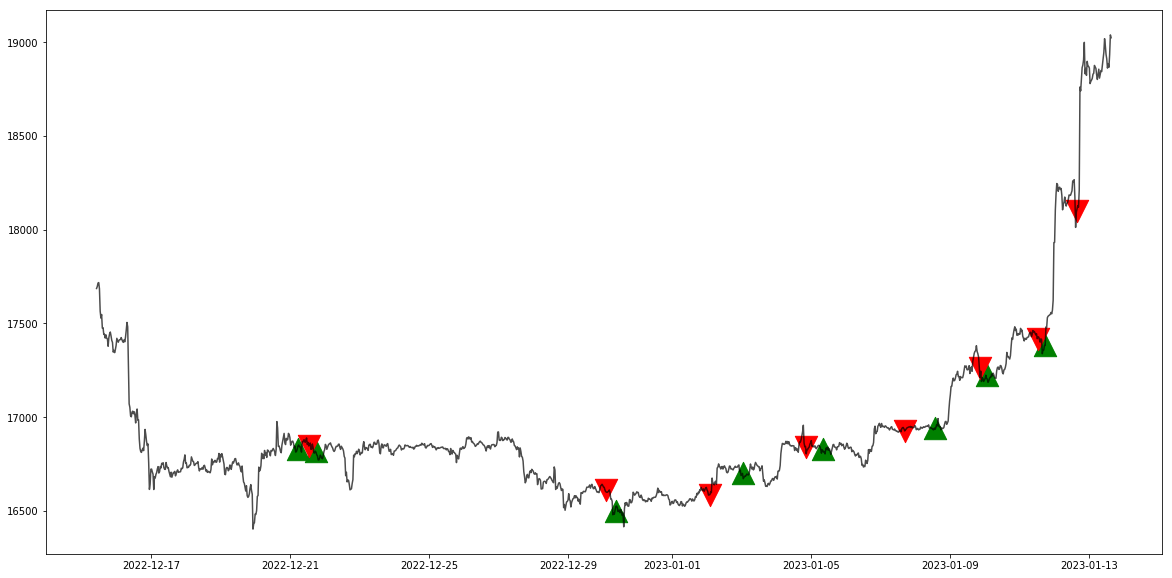

In [37]:
plt.figure(figsize=(20,10))
plt.plot(df.Close,color='K',alpha=0.7)
plt.scatter(actuals.Buying_date,df.Open[actuals.Buying_date],marker='^',color='g',s=500)
plt.scatter(actuals.Selling_dates,df.Open[actuals.Selling_dates],marker='v',color='r',s=500)

In [40]:
for num,j in enumerate(df.Sell[i:]):
    print(num,j)

0 0
1 0
